In [40]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import display
import numpy as np

In [41]:
# Step 1: Load the Data
url = 'https://raw.githubusercontent.com/marcanthonny/projectDSML/refs/heads/main/historical_data.csv'
df = pd.read_csv(url)
print("Raw Dataset:")
display(df.head())

# Step 2: Preprocess the Data
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['Delivery Duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()
print("\nDataset after Feature Engineering:")
display(df.head())

# Step 3: Select Features
features = df[['total_onshift_dashers', 'subtotal']]
features = features.dropna()
print("\nDataset after Handling Missing Values:")
display(features.head())

# Step 4: Normalize the Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)
print("\nNormalized Data:")
display(features_scaled.head())

Raw Dataset:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0



Dataset after Feature Engineering:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0



Dataset after Handling Missing Values:


,total_onshift_dashers,subtotal
0,33.0,3441
1,1.0,1900
2,1.0,1900
3,1.0,6900
4,6.0,3900



Normalized Data:


,total_onshift_dashers,subtotal
0,-0.341999,0.405880
1,-1.268818,-0.436525
2,-1.268818,-0.436525
3,-1.268818,2.296783
4,-1.124003,0.656798


C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

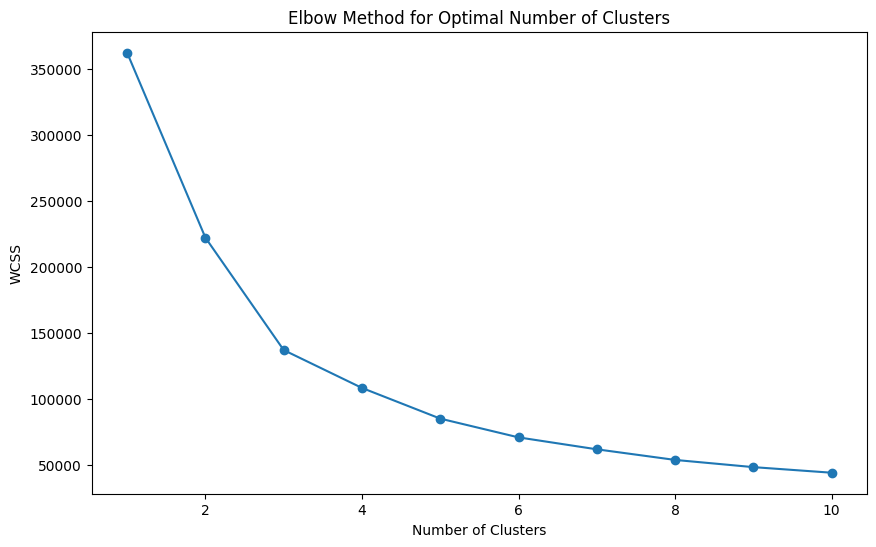

In [42]:
# Step 5: Elbow Method to Determine Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Clustered DataFrame:


,total_onshift_dashers,subtotal,Cluster,Cluster Label
0,33.0,3441,2,Chill Zoners
1,1.0,1900,2,Chill Zoners
2,1.0,1900,2,Chill Zoners
3,1.0,6900,1,Mellow Middlers
4,6.0,3900,2,Chill Zoners


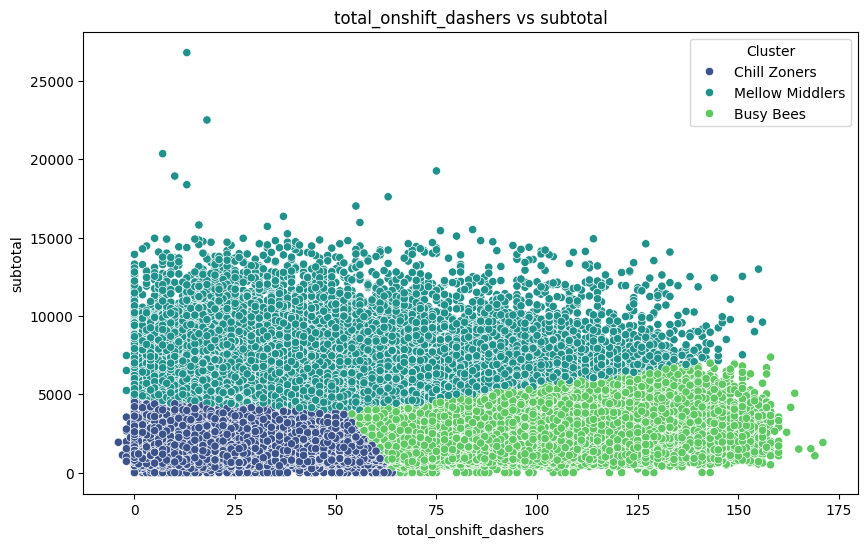

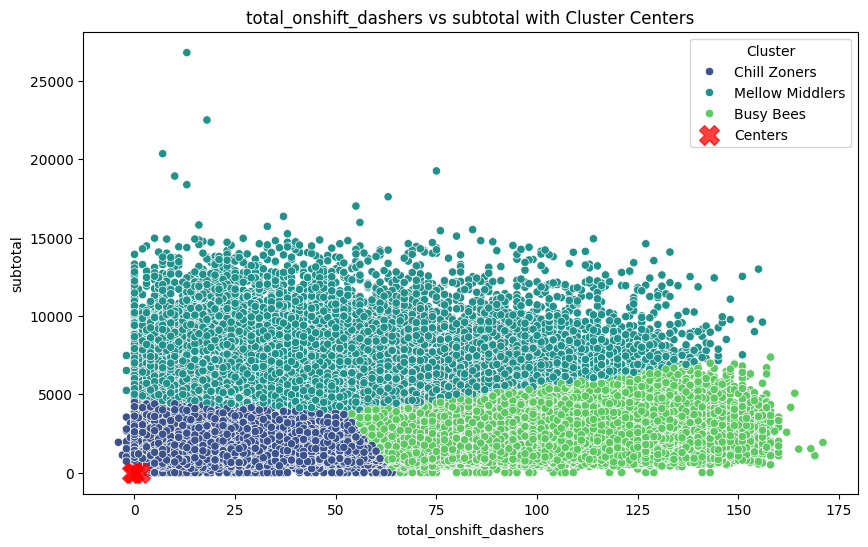

In [43]:
# Step 5: Apply K-Means Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)
clustered_df = features.copy()
clustered_df['Cluster'] = kmeans.labels_
cluster_labels = {0: 'Busy Bees', 1: 'Mellow Middlers', 2: 'Chill Zoners'}
clustered_df['Cluster Label'] = clustered_df['Cluster'].map(cluster_labels)
print("\nClustered DataFrame:")
display(clustered_df.head())

# Step 6: Visualize the Clusters for 'total_onshift_dashers' vs 'subtotal'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustered_df['total_onshift_dashers'], y=clustered_df['subtotal'], hue=clustered_df['Cluster Label'], palette='viridis')
plt.xlabel('total_onshift_dashers')
plt.ylabel('subtotal')
plt.title('total_onshift_dashers vs subtotal')
plt.legend(title='Cluster')
plt.show()

# Visualize cluster centers on the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustered_df['total_onshift_dashers'], y=clustered_df['subtotal'], hue=clustered_df['Cluster Label'], palette='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.xlabel('total_onshift_dashers')
plt.ylabel('subtotal')
plt.title('total_onshift_dashers vs subtotal with Cluster Centers')
plt.legend(title='Cluster')
plt.show()

In [46]:
# Step 7: Select Features for 'total_onshift_dashers' vs 'Delivery Duration'
features = df[['total_onshift_dashers', 'Delivery Duration']]
features = features.dropna()
print("\nDataset after Handling Missing Values:")
display(features.head())


Dataset after Handling Missing Values:


,total_onshift_dashers,Delivery Duration
0,33.0,3779.0
1,1.0,4024.0
2,1.0,1781.0
3,1.0,3075.0
4,6.0,2390.0



Numerical Features:


,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
0,1.0,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0



Correlation Matrix:


,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
market_id,1.000000,0.017301,-0.021895,-0.006855,-0.016237,0.002557,-0.000150,-0.004921,0.069752,0.060488,0.063754,-0.053241,0.006597,-0.005784
store_id,0.017301,1.000000,0.019554,-0.008796,-0.013370,-0.012727,-0.009128,-0.018661,-0.023141,-0.023245,-0.020348,0.017469,0.001953,-0.000414
order_protocol,-0.021895,0.019554,1.000000,0.008790,-0.053623,-0.023342,-0.045421,-0.090960,0.145022,0.149584,0.134895,-0.678222,-0.008326,-0.006660
total_items,-0.006855,-0.008796,0.008790,1.000000,0.558067,0.763912,-0.393149,-0.058233,0.031732,0.028602,0.034380,-0.023643,0.004692,0.004905
subtotal,-0.016237,-0.013370,-0.053623,0.558067,1.000000,0.681101,0.037038,0.505547,0.130831,0.125566,0.130106,0.039043,0.034665,0.011200
num_distinct_items,0.002557,-0.012727,-0.023342,0.763912,0.681101,1.000000,-0.448739,0.041871,0.065943,0.060638,0.067800,0.003507,0.022693,0.006741
min_item_price,-0.000150,-0.009128,-0.045421,-0.393149,0.037038,-0.448739,1.000000,0.545484,0.042368,0.043881,0.041002,0.053073,0.003373,0.004762
max_item_price,-0.004921,-0.018661,-0.090960,-0.058233,0.505547,0.041871,0.545484,1.000000,0.133113,0.131005,0.130676,0.085287,0.026591,0.009409
total_onshift_dashers,0.069752,-0.023141,0.145022,0.031732,0.130831,0.065943,0.042368,0.133113,1.000000,0.943789,0.936122,-0.185650,0.045925,0.046972
total_busy_dashers,0.060488,-0.023245,0.149584,0.028602,0.125566,0.060638,0.043881,0.131005,0.943789,1.000000,0.932913,-0.191811,0.044504,0.060641


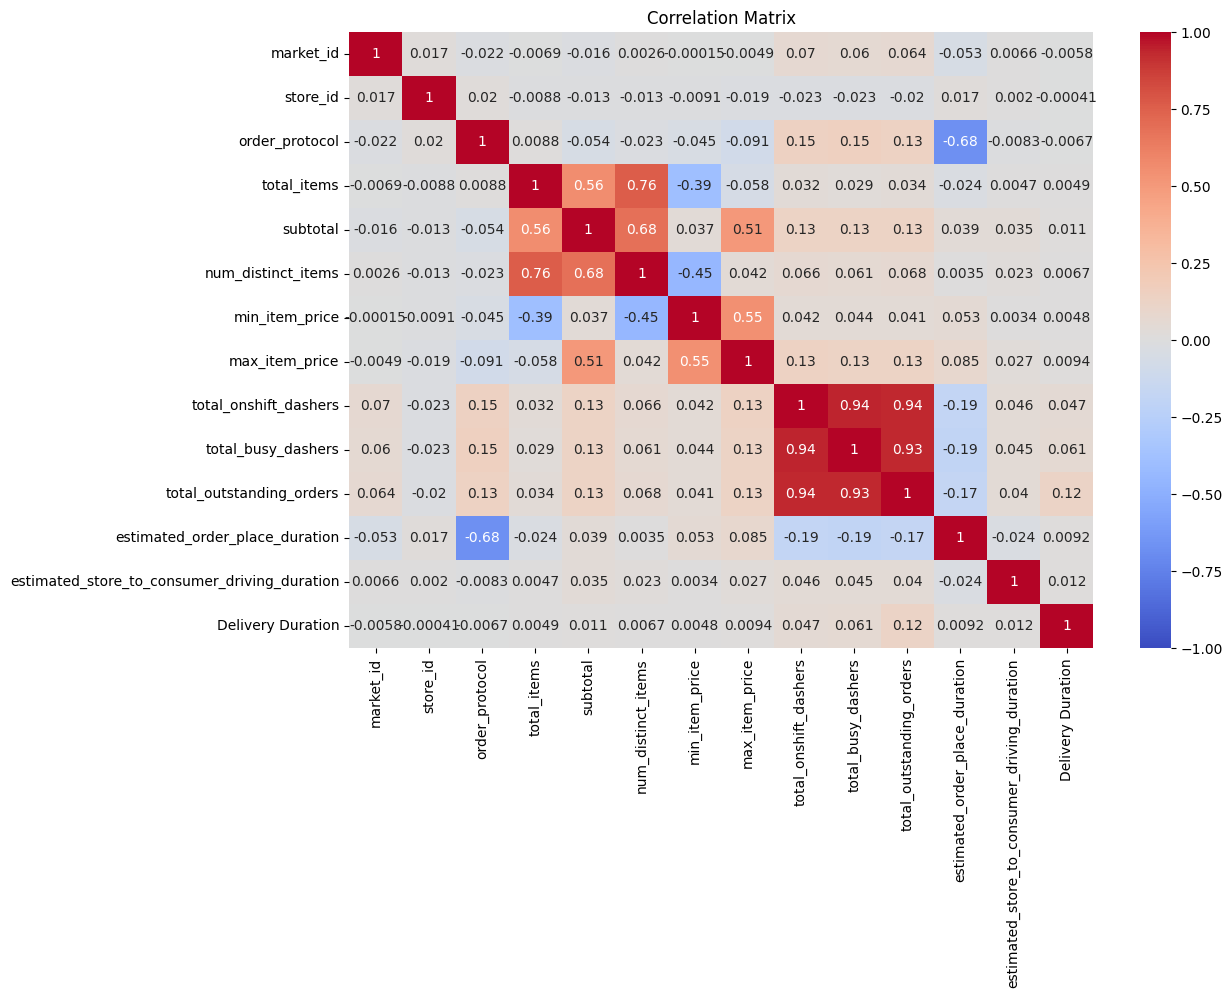

In [45]:
# Step 3: Select Numerical Features for Correlation Matrix
numerical_features = df.select_dtypes(include=[np.number])
print("\nNumerical Features:")
display(numerical_features.head())

# Step 4: Calculate Correlation Matrix
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix:")
display(correlation_matrix)

# Step 5: Visualize Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_15576\928262028.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


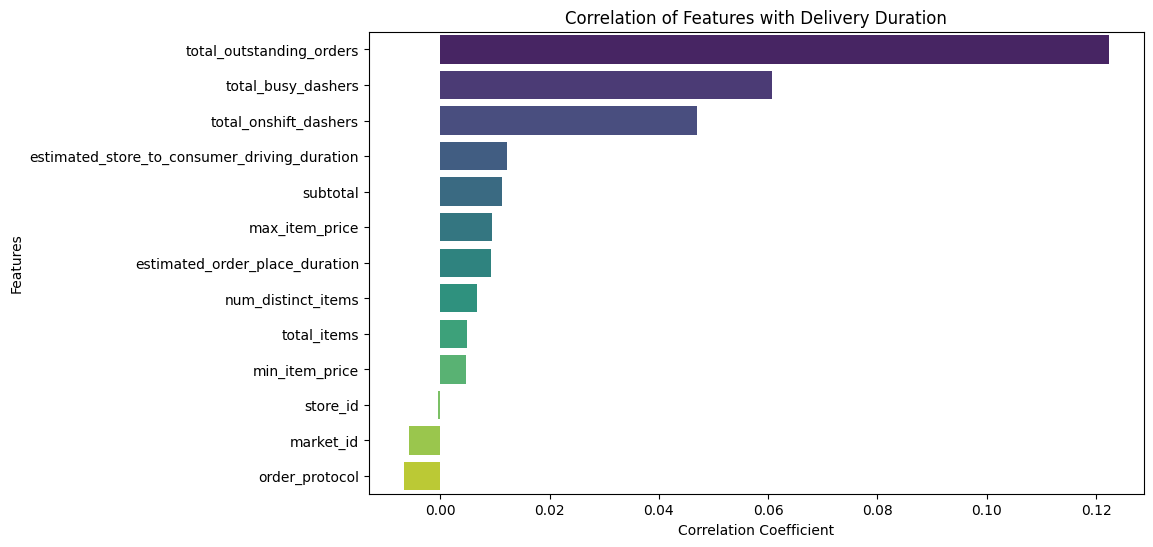

In [47]:
# Step 6: Bar Chart of Correlation with Target Variable
target_variable = 'Delivery Duration'
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)
correlation_with_target = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title(f'Correlation of Features with {target_variable}')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the data
X = features_scaled
y = kmeans.labels_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the cluster labels for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9308
           1       1.00      1.00      1.00      5066
           2       1.00      1.00      1.00     21860

    accuracy                           1.00     36234
   macro avg       1.00      1.00      1.00     36234
weighted avg       1.00      1.00      1.00     36234

Confusion Matrix:
[[ 9301     7     0]
 [    2  5054    10]
 [    0     3 21857]]
Accuracy: 0.9993928354584092


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9308
           1       1.00      1.00      1.00      5066
           2       1.00      1.00      1.00     21860

    accuracy                           1.00     36234
   macro avg       1.00      1.00      1.00     36234
weighted avg       1.00      1.00      1.00     36234

Accuracy: 0.9995308273996799


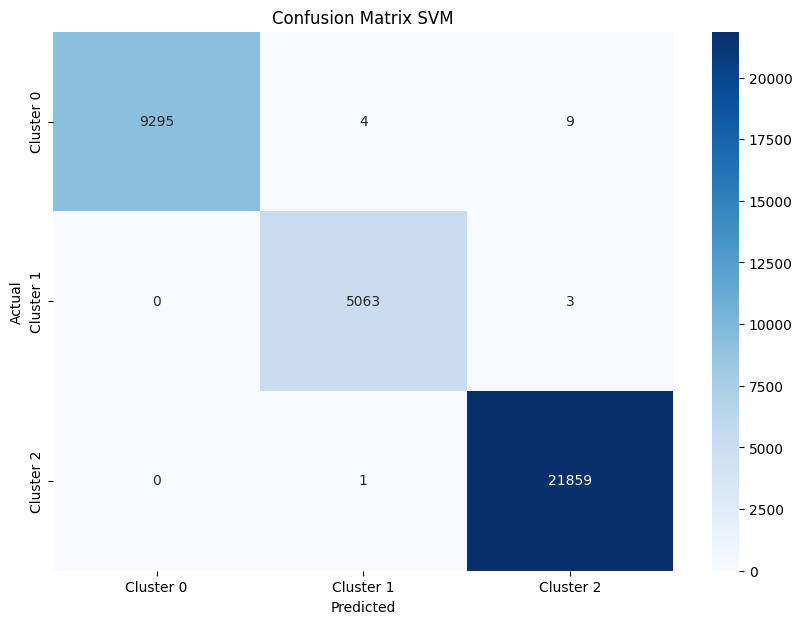

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the data
X = features_scaled
y = kmeans.labels_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict the cluster labels for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[cluster_labels[i] for i in unique_labels], yticklabels=[cluster_labels[i] for i in unique_labels])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9308
           1       1.00      1.00      1.00      5066
           2       1.00      1.00      1.00     21860

    accuracy                           1.00     36234
   macro avg       1.00      1.00      1.00     36234
weighted avg       1.00      1.00      1.00     36234

Accuracy: 0.9992824419053927


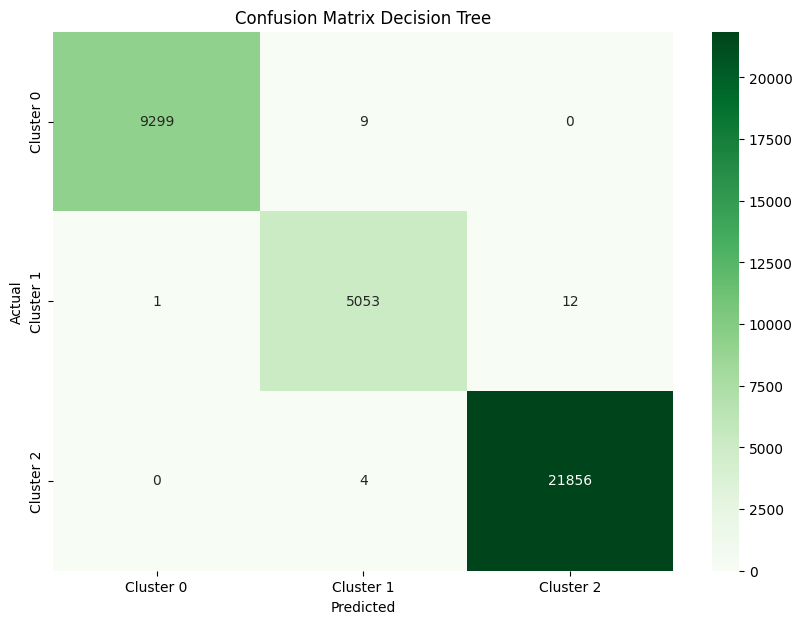

In [59]:
# Step 6: Prepare Data for Decision Tree
X = features_scaled
y = kmeans.labels_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict the cluster labels for the test set
y_pred = dt_model.predict(X_test)

# Step 8: Evaluate the Model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[cluster_labels[i] for i in unique_labels], yticklabels=[cluster_labels[i] for i in unique_labels])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Decision Tree Model: DecisionTreeClassifier(criterion='entropy', random_state=42)
Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9308
           1       1.00      1.00      1.00      5066
           2       1.00      1.00      1.00     21860

    accuracy                           1.00     36234
   macro avg       1.00      1.00      1.00     36234
weighted avg       1.00      1.00      1.00     36234

Confusion Matrix:
[[ 9297    11     0]
 [    6  5049    11]
 [    0     4 21856]]
Accuracy: 0.9991168515758679


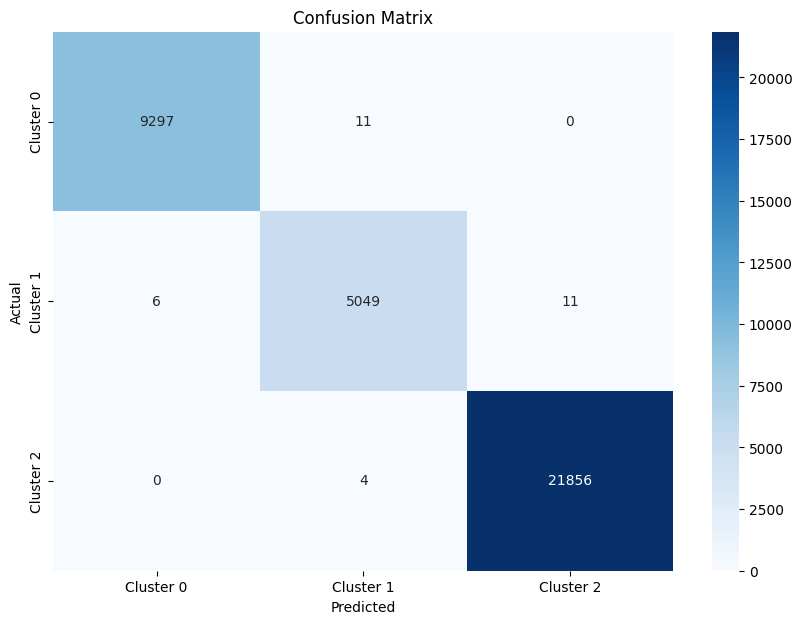

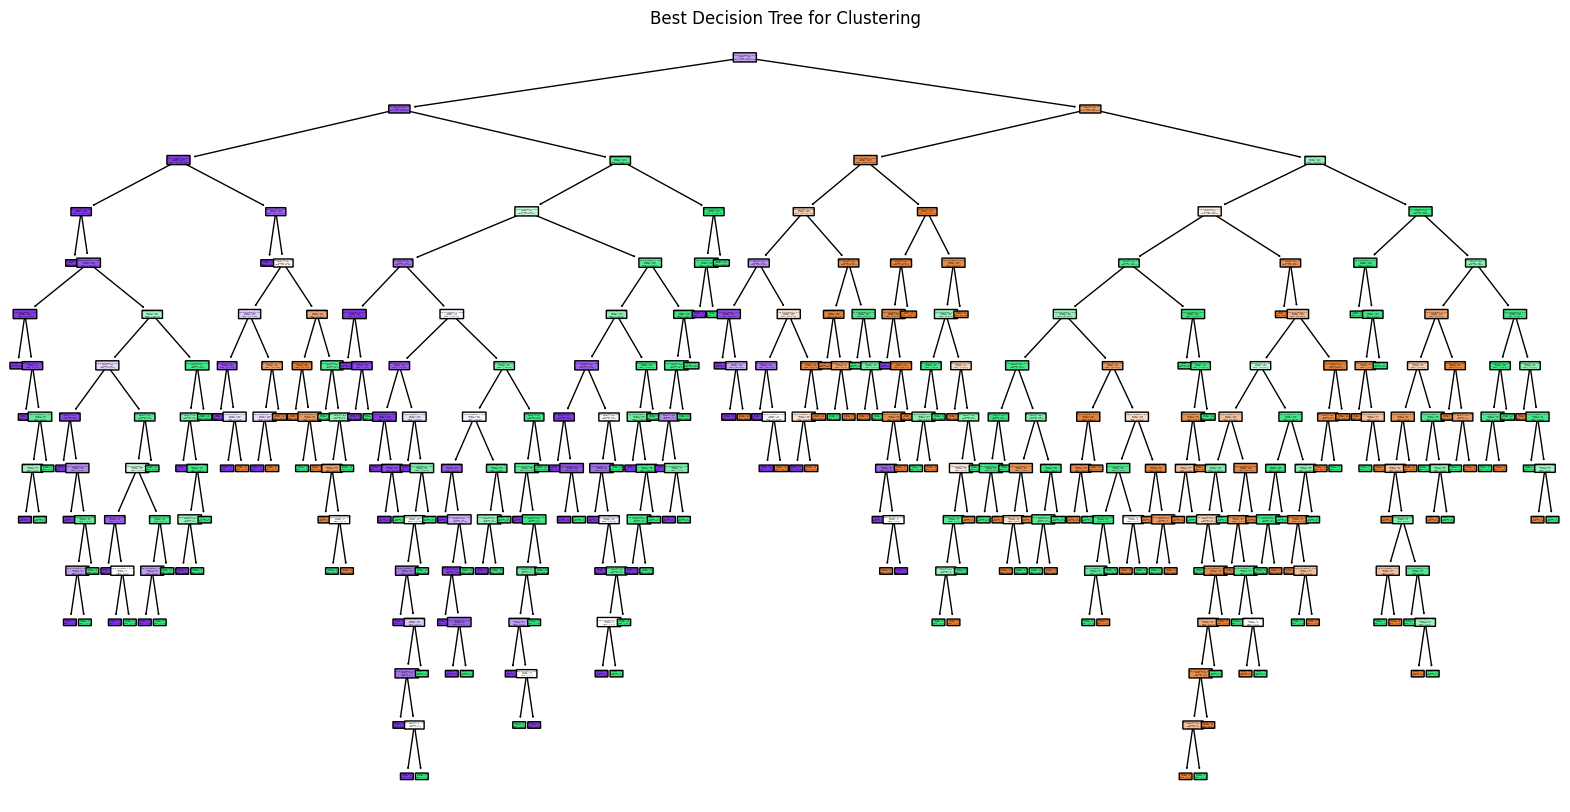

In [58]:
# Step 9: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_
print("\nBest Decision Tree Model:", best_dt_model)

# Predict the cluster labels for the test set using the best model
y_pred_best = best_dt_model.predict(X_test)

# Step 10: Evaluate the Best Model
print("Best Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred_best))

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[cluster_labels[i] for i in range(n_clusters)], yticklabels=[cluster_labels[i] for i in range(n_clusters)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

# Step 11: Visualize the Best Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=features.columns, class_names=[cluster_labels[i] for i in range(len(cluster_labels))], filled=True, rounded=True)
plt.title('Best Decision Tree for Clustering')
plt.show()


Description of Best Model Evaluation:
The best Decision Tree model was obtained after performing hyperparameter tuning using GridSearchCV. The best model has the following parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9308
           1       1.00      1.00      1.00      5066
           2       1.00      1.00      1.00     21860

    accuracy                           1.00     36234
   macro avg       1.00      1.00      1.00     36234
weighted avg       1.00      1.00      1.00     36234



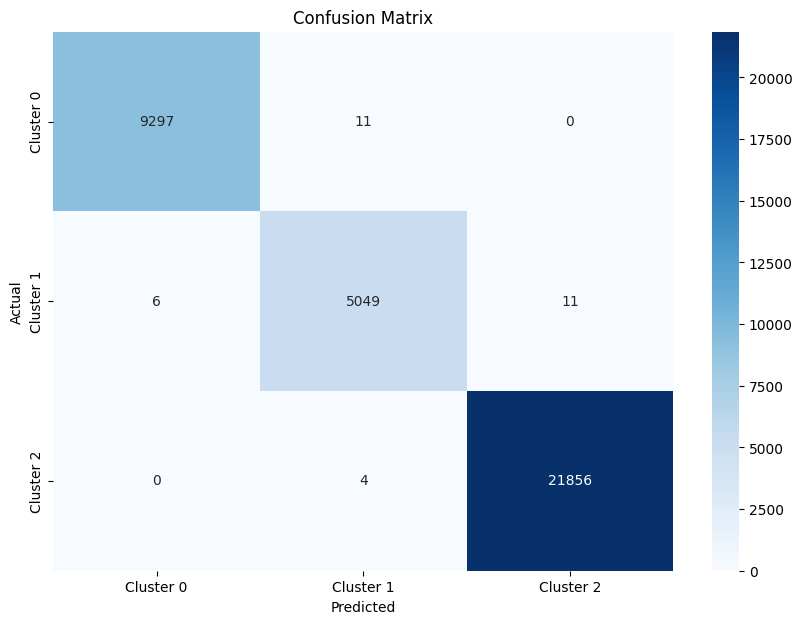

Accuracy: 1.00

The classification report provides detailed metrics for each cluster, including precision, recall, and F1-score. The confusion matrix visualizes the performance of the model by showing the true positive, false positive, true negative, and false negative predictions for each cluster. The overall accuracy of the best model is {accuracy:.2f}, indicating the proportion of correctly predicted cluster labels out of the total predictions.


In [ ]:
# Step 12: Description of Best Model Evaluation
print("\nDescription of Best Model Evaluation:")
print(f"The best Decision Tree model was obtained after performing hyperparameter tuning using GridSearchCV. The best model has the following parameters:\n{best_dt_model.get_params()}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Green', xticklabels=[cluster_labels[i] for i in range(n_clusters)], yticklabels=[cluster_labels[i] for i in range(n_clusters)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy:.2f}")

print("\nThe classification report provides detailed metrics for each cluster, including precision, recall, and F1-score. The confusion matrix visualizes the performance of the model by showing the true positive, false positive, true negative, and false negative predictions for each cluster. The overall accuracy of the best model is {accuracy:.2f}, indicating the proportion of correctly predicted cluster labels out of the total predictions.")